library

In [ ]:
import numpy as np
import pandas as pd
cardata=pd.read_csv('/content/car data.csv')

getting data

In [ ]:
cardata


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


represetation of two variables


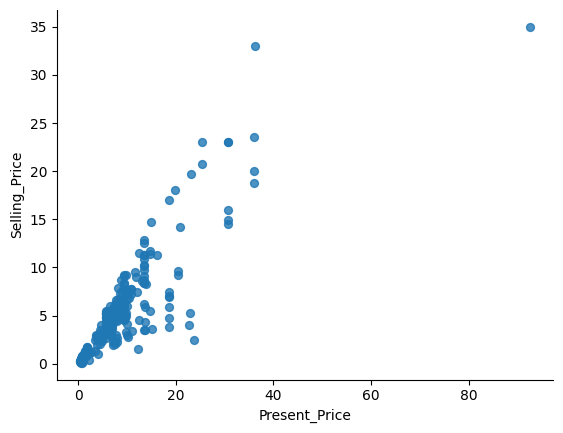

In [ ]:
from matplotlib import pyplot as plt
cardata.plot(kind='scatter', y='Selling_Price', x='Present_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

data converted in operable form

In [ ]:
X1=np.array(cardata[['Present_Price']])
X2=np.array(cardata[['Year']])
X3=np.array(cardata[['Kms_Driven']])

Y=np.array(cardata[['Selling_Price']])
print(X2.shape, Y.shape)

(301, 1) (301, 1)


scaling

In [ ]:
X1=(X1-np.mean(X1))/np.std(X1)
X2=(X2-np.mean(X2))/np.std(X2)
X3=(X3-np.mean(X3))/np.std(X3)

In [ ]:

Y=(Y-int(np.mean(Y)))/np.std(Y)

adding th column of ones in x

In [ ]:
a=np.ones([301,1], dtype='float')
a

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
X=np.concatenate((X1,X2), axis=1)
X=np.concatenate((X, X3), axis=1)
X=np.concatenate((X, a), axis =1)


making class for the model

In [ ]:
class lr():
  def _init_(self):
    pass


  def forward(self, X,Y, W):
    y_pred=sum(X*W)
    loss=((y_pred-Y)**2)/2
    return loss, y_pred


  def updateweights(self, X, Y, y_pred, W, alpha, index):
    for i in range(X.shape[1]):
      W[i]-=(alpha*(y_pred-Y[index])*X[index][i])
    return W


  def train(self, X, Y, epochs=10, alpha=0.001, randomstate=0):
    numrows = np.shape(X)[0]
    numcolumns = np.shape(X)[1]
    W=np.random.randn(1, numcolumns)/np.sqrt(numrows)  #why rowsdivided
    train_loss=[]
    epochnumber=[]
    train_indices=[i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(randomstate)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred=self.forward(X[i],Y[i],W[0])
        cost+=loss
        W[0]=self.updateweights(X,Y, y_pred, W[0],alpha, i)
      train_loss.append(cost)
      epochnumber.append(j)
    return W[0], train_loss, epochnumber


  def test(self, Xtest, Ytest, W_trained):
      test_pred=[]
      test_loss=[]
      testindices=[i for i in range(Xtest.shape[0])]
      for i in testindices:
        loss, y=self.forward(Xtest[i], Ytest[i], W_trained)
        test_pred.append(y)
        test_loss.append(loss)
      return test_pred, test_loss









In [ ]:
reg=lr()

In [ ]:
xtrain=np.array(X[0:200])
ytrain=np.array(Y[0:200])
xtest=np.array(X[200:300])
ytest=np.array(Y[200:300])

In [ ]:
W, trainloss, epoch=reg.train(xtrain, ytrain)

In [ ]:
test_pred, test_loss=reg.test(xtest, ytest, W)

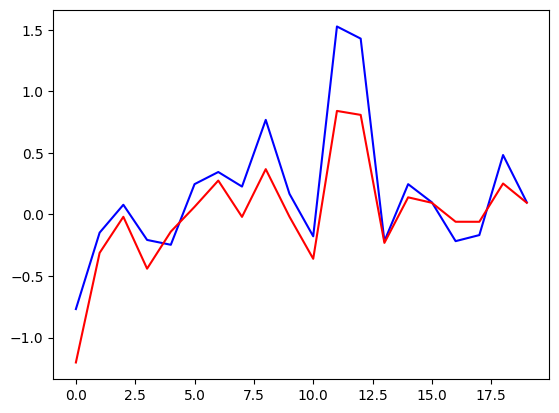

In [ ]:
x=[i for i in range(20)]
plt.plot(x,ytest[0:20], c='blue')
plt.plot(x, test_pred[0:20], c='red')
plt.show()